In [33]:
#import packages and verify versions

# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)


numpy: 1.15.4
scipy: 0.19.1
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1


# Case Study : Higgs Bosson Challenge 


The challenge data is now available on http://opendata.cern.ch/collection/ATLAS-Higgs-Challenge-2014. The case study is to classify the events into signals and background, any other event other than the signal. This is a binary classification problem. Instead of the entire data set, we have used a sample data set which has training data size of 10000 and a separate testing data of size 5000 with labels on which models will be evaluated. We will also assume the best model is selected based on the classification accuracy achieved on the test data, with metrics of accuracy, as the data is well balanced between the two classes.

# 1. Loading Training and Testing CSV files using Pandas

In [34]:
from pandas import read_csv
train_file = './data/higgs_train_10k.csv'
test_file = './data/higgs_test_5k.csv'
names = [
    'response',
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x10',
    'x11',
    'x12',
    'x13',
    'x14',
    'x15',
    'x16',
    'x17',
    'x18',
    'x19',
    'x20',
    'x21',
    'x22',
    'x23',
    'x24',
    'x25',
    'x26',
    'x27',
    'x28']
train_data = read_csv(train_file, names=names)
test_data = read_csv(test_file, names=names)
print(train_data.shape)
print(test_data.shape)


(10000, 29)
(5000, 29)


# 2. Exploratory Data Analysis

In [35]:
# give the peek into the dataset
peek = train_data.head(20)
print(peek)

    response     x1     x2       x3     x4      x5     x6      x7      x8  \
0        1.0  0.869 -0.635  0.22600  0.327 -0.6900  0.754 -0.2490 -1.0900   
1        1.0  0.908  0.329  0.35900  1.500 -0.3130  1.100 -0.5580 -1.5900   
2        1.0  0.799  1.470 -1.64000  0.454  0.4260  1.100  1.2800  1.3800   
3        0.0  1.340 -0.877  0.93600  1.990  0.8820  1.790 -1.6500 -0.9420   
4        1.0  1.110  0.321  1.52000  0.883 -1.2100  0.681 -1.0700 -0.9220   
5        0.0  1.600 -0.608  0.00707  1.820 -0.1120  0.848 -0.5660  1.5800   
6        1.0  0.409 -1.880 -1.03000  1.670 -1.6000  1.340  0.0554  0.0135   
7        1.0  0.934  0.629  0.52800  0.238 -0.9670  0.548 -0.0594 -1.7100   
8        1.0  1.410  0.537  0.69000  1.180 -0.1100  3.200 -1.5300 -1.5800   
9        1.0  1.180  0.104  1.40000  0.480  0.2660  1.140  1.5300 -0.2530   
10       1.0  0.946  1.110  1.22000  0.908  0.8220  1.150 -0.3650 -1.5700   
11       0.0  0.739 -0.178  0.83000  0.505 -0.1300  0.961 -0.3560 -1.7200   

In [5]:
# datatype of each feataure
types = train_data.dtypes
print(types)

response    float64
x1          float64
x2          float64
x3          float64
x4          float64
x5          float64
x6          float64
x7          float64
x8          float64
x9          float64
x10         float64
x11         float64
x12         float64
x13         float64
x14         float64
x15         float64
x16         float64
x17         float64
x18         float64
x19         float64
x20         float64
x21         float64
x22         float64
x23         float64
x24         float64
x25         float64
x26         float64
x27         float64
x28         float64
dtype: object


In [37]:
#base statistics for data
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 5)
description = train_data.describe()
print(description)

          response           x1           x2           x3           x4           x5           x6  \
count  10000.00000  10000.00000  10000.00000  10000.00000  10000.00000  10000.00000  10000.00000   
mean       0.52950      0.99794     -0.01666     -0.00347      0.99140     -0.00980      0.99203   
std        0.49915      0.57498      1.00302      1.01083      0.59549      1.00477      0.47739   
min        0.00000      0.27500     -2.43000     -1.74000      0.01240     -1.74000      0.15900   
25%        0.00000      0.59600     -0.74400     -0.87200      0.57100     -0.88600      0.68000   
50%        1.00000      0.85900     -0.02880      0.00064      0.88600     -0.01995      0.89750   
75%        1.00000      1.25000      0.71500      0.88200      1.29000      0.85700      1.17000   
max        1.00000      6.70000      2.43000      1.74000      5.82000      1.74000      7.06000   

                x7           x8           x9     ...               x19          x20          x21  \

In [38]:
# class distribution for train and test
train_data_class = train_data.groupby('response').size()
print(train_data_class)
test_data_class = test_data.groupby('response').size()
print(test_data_class)

response
0.0    4705
1.0    5295
dtype: int64
response
0    2315
1    2685
dtype: int64


In [8]:
# pearsons correlation to understand feature independence
correlations = train_data.corr(method='pearson')
print(correlations)

          response        x1        x2        x3        x4        x5  \
response  1.000000 -0.043412 -0.017847  0.003832 -0.098695 -0.009926   
x1       -0.043412  1.000000 -0.002003 -0.006841 -0.146616 -0.007276   
x2       -0.017847 -0.002003  1.000000 -0.001032 -0.004541  0.010214   
x3        0.003832 -0.006841 -0.001032  1.000000 -0.003505 -0.056158   
x4       -0.098695 -0.146616 -0.004541 -0.003505  1.000000  0.008707   
x5       -0.009926 -0.007276  0.010214 -0.056158  0.008707  1.000000   
x6        0.065445  0.170189 -0.016985 -0.005674  0.200919 -0.006627   
x7        0.002017 -0.008616  0.276300  0.015613 -0.010615 -0.000788   
x8       -0.004660 -0.003802 -0.000249 -0.165337 -0.003835 -0.156438   
x9       -0.020237 -0.000402 -0.010563 -0.011045 -0.018916 -0.007318   
x10       0.034473 -0.002693 -0.003468  0.000368  0.035938 -0.002417   
x11       0.023618 -0.010853  0.274618  0.018211  0.007825  0.002779   
x12       0.002424 -0.008658 -0.005576 -0.074098  0.010897 -0.07

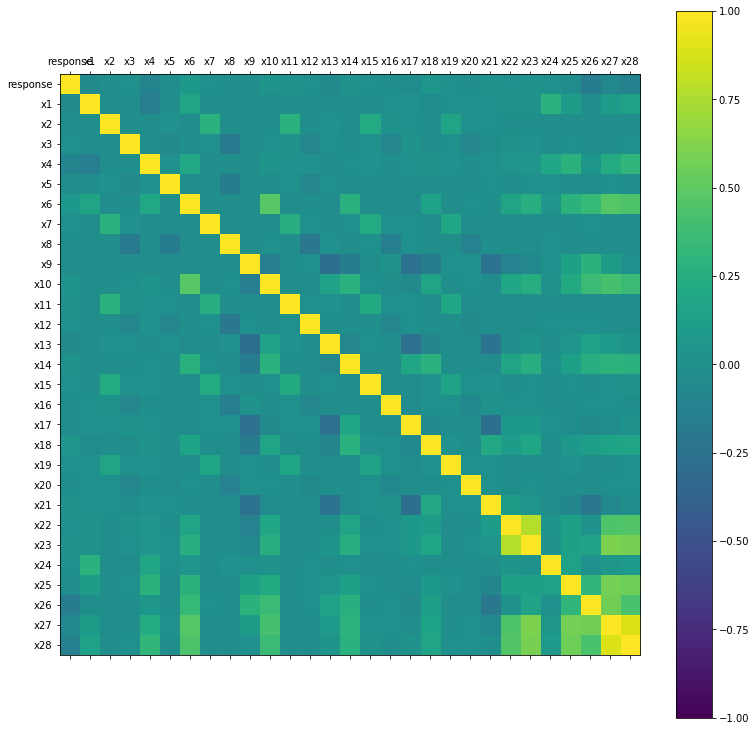

In [12]:
# visualization of correlations
import matplotlib.pyplot as pyplot
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,29,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.rcParams['figure.figsize'] = (27,27)
pyplot.show()

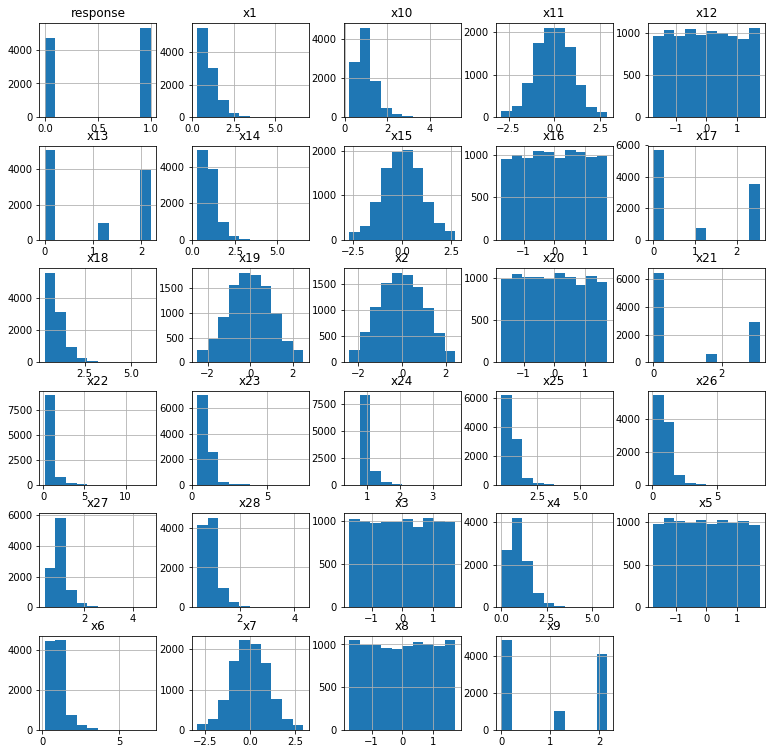

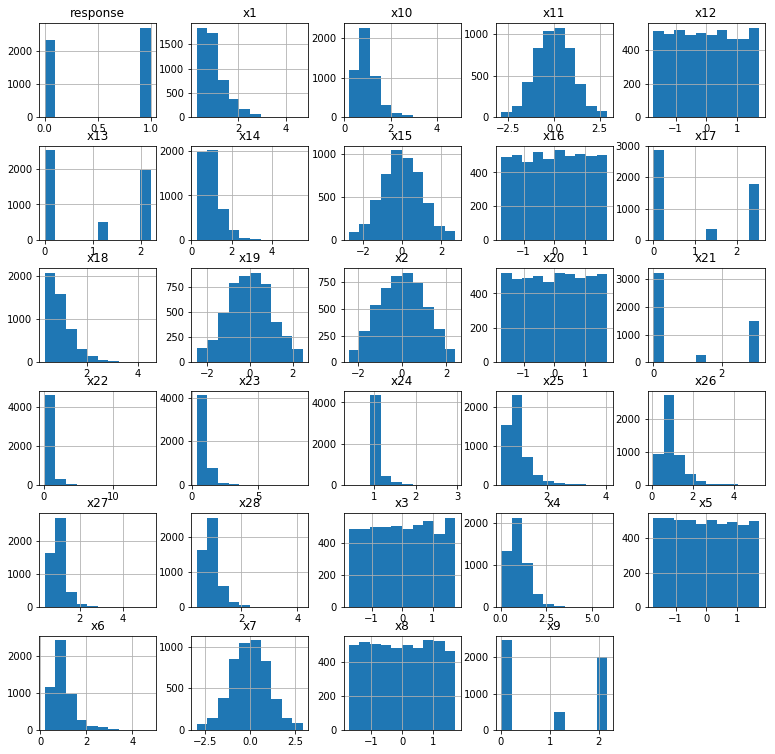

In [11]:
# visualization using pyplot and histograms of training and testing data
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (13,13)
train_data.hist()
pyplot.show()
test_data.hist()
pyplot.show()

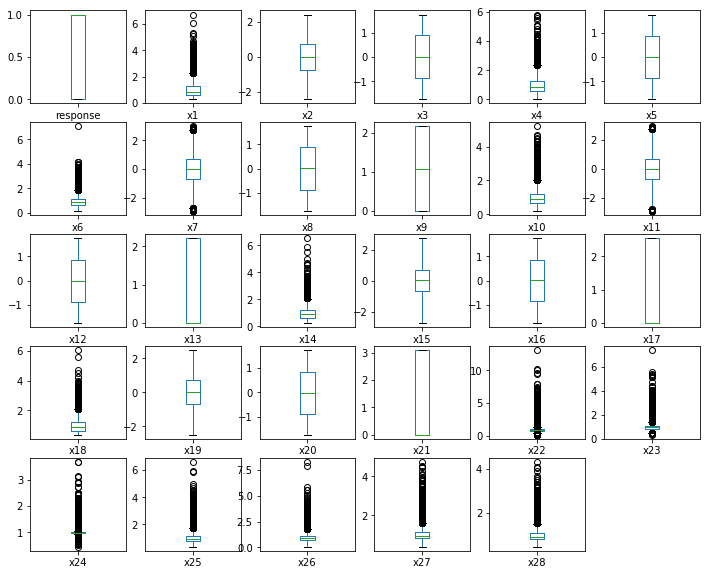

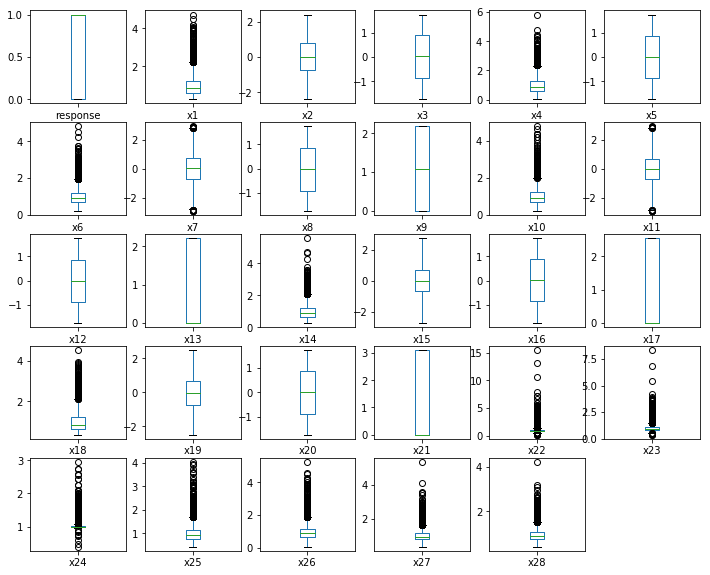

In [14]:
# boxplot visualization of train and test data
pyplot.rcParams['figure.figsize'] = (12,12)
train_data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
pyplot.show()
test_data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
pyplot.rcParams['figure.figsize'] = (12,12)
pyplot.show()

# 3. Train and Test Data as Vector/Matrix Representation for Modeling

In [15]:
# train data
train_array = train_data.values
# separate array into input and output variables
X_train = train_array[:,1:28]
y_train = train_array[:,0]
# test data
test_array = test_data.values
# separate array into input and output variables
X_test = test_array[:,1:28]
y_test = test_array[:,0]

## Manifold Visualization of Data

Isomap: 77 sec


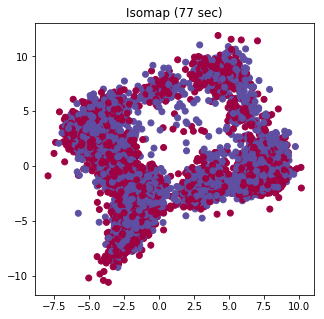

Isomap: 78 sec


/Users/udaykamath/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


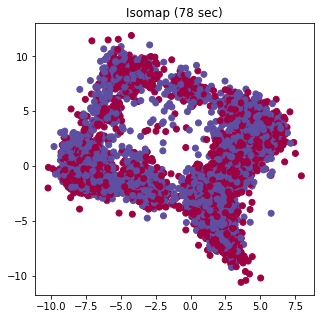

Isomap: 79 sec


/Users/udaykamath/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


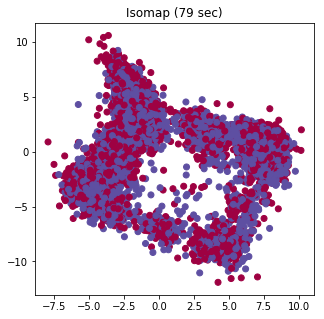

Isomap: 76 sec


/Users/udaykamath/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


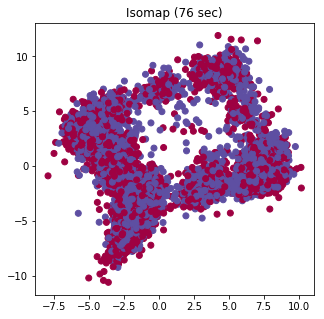

MDS: 4e+02 sec


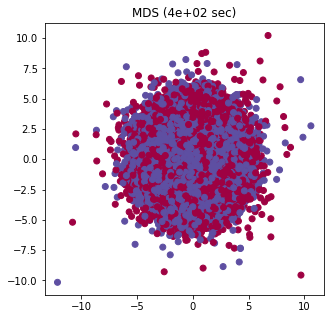

/Users/udaykamath/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


SpectralEmbedding: 36 sec


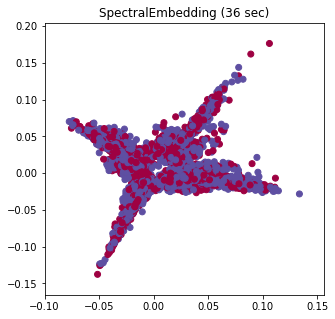

t-SNE: 2.9e+02 sec


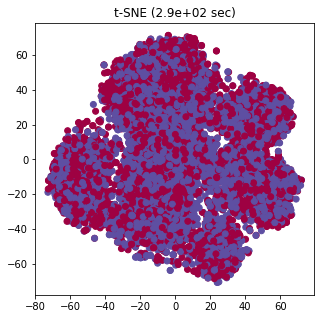

In [40]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

n_neighbors = 10
n_components = 2
color=y_train

for i, method in enumerate(methods):
    t0 = time()
    Ytransformed = manifold.Isomap(n_neighbors, n_components).fit_transform(X_train)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1],c=color, cmap=plt.cm.Spectral)
    plt.title(labels[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Ytransformed = mds.fit_transform(X_train)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Ytransformed = se.fit_transform(X_train)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Ytransformed = tsne.fit_transform(X_train)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

# 4. Feature Transformation using PCA

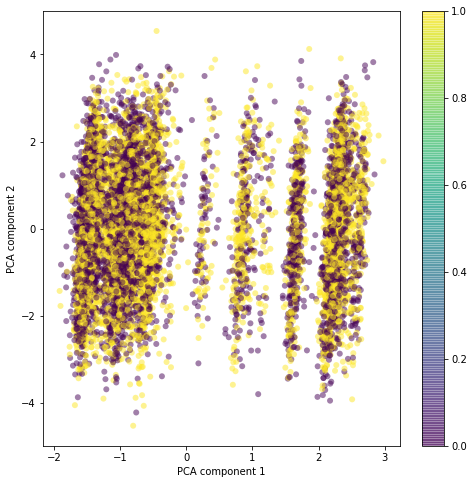

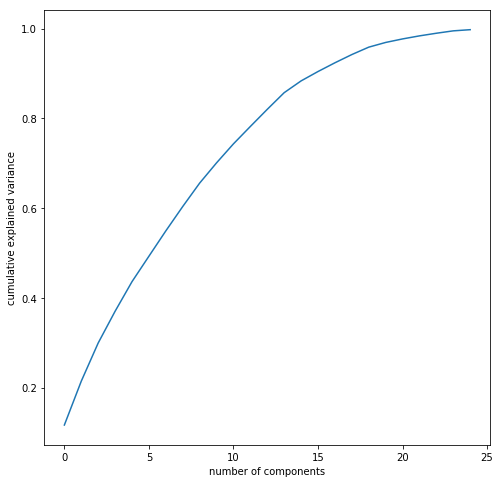

Explained Variance: [0.11675805 0.09773677 0.08504891 0.07073058 0.06598328 0.05667145
 0.05645659 0.05431017 0.05216481 0.0451427  0.04236952 0.03873282
 0.03818627 0.03710655 0.02624647 0.02087842 0.01946626 0.01833357
 0.01650435 0.01048494 0.00786502 0.00680588 0.00586647 0.00531584
 0.00259944]


In [18]:
# Feature decomposition  with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X_train)
projected = pca.fit_transform(X_train)

pyplot.scatter(projected[:, 0], projected[:, 1],
               c=y_train, edgecolor='none', alpha=0.5)
pyplot.xlabel('PCA component 1')
pyplot.ylabel('PCA component 2')
pyplot.rcParams['figure.figsize'] = (8, 8)
pyplot.colorbar()
pyplot.show()
pca = PCA(n_components=25)
fit = pca.fit(X_train)
pyplot.plot(numpy.cumsum(fit.explained_variance_ratio_))
pyplot.xlabel('number of components')
pyplot.ylabel('cumulative explained variance')
pyplot.show()
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)


# 5. Feature Selection impact and scores on Training Data

In [22]:
from sklearn import preprocessing
from sklearn.feature_selection import chi2

min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
chi2_score = chi2(X_train_scaled, y_train)[0]
features = [
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x10',
    'x11',
    'x12',
    'x13',
    'x14',
    'x15',
    'x16',
    'x17',
    'x18',
    'x19',
    'x20',
    'x21',
    'x22',
    'x23',
    'x24',
    'x25',
    'x26',
    'x27',
    'x28']
fscores = zip(features, chi2_score)
wchi2 = sorted(fscores, key=lambda x: x[1], reverse=True)
scores_labels = numpy.asarray(wchi2)
print(scores_labels)
label = [row[0] for row in scores_labels]
print(label)
score = [row[1] for row in scores_labels]
print(score)
y_pos = numpy.arange(len(score))
yrange = range(len(score))
print(yrange)


[['x26' '8.90346287406173']
 ['x13' '8.873767232814378']
 ['x4' '6.074553078659575']
 ['x17' '5.020814821701416']
 ['x21' '3.0510676840250426']
 ['x9' '1.9768680369522516']
 ['x27' '1.9373519120568163']
 ['x18' '1.909799833010493']
 ['x6' '1.697837656070137']
 ['x1' '1.3412511268408103']
 ['x10' '0.7150322189439381']
 ['x11' '0.3380142518419011']
 ['x25' '0.32381562342198966']
 ['x14' '0.3217357786256996']
 ['x2' '0.27317919170713356']
 ['x5' '0.1651835898368211']
 ['x23' '0.0850254388420135']
 ['x19' '0.04429125896576026']
 ['x8' '0.03693118126530916']
 ['x20' '0.03260105301887961']
 ['x3' '0.02482112189541311']
 ['x15' '0.012855629792167884']
 ['x12' '0.009810181623278392']
 ['x22' '0.0074272620516064244']
 ['x16' '0.006749348941104573']
 ['x24' '0.006720238048008207']
 ['x7' '0.002361231954228931']]
['x26', 'x13', 'x4', 'x17', 'x21', 'x9', 'x27', 'x18', 'x6', 'x1', 'x10', 'x11', 'x25', 'x14', 'x2', 'x5', 'x23', 'x19', 'x8', 'x20', 'x3', 'x15', 'x12', 'x22', 'x16', 'x24', 'x7']
['8.9

# 6. Model Creation, Tuning Hyperparameters and Validation using Train Data¶

In [25]:
# perform grid search to find the best parameter for Logistic Regression,
# Perceptron, Naive Bayes, LDA algorithm
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# using roc AUC as scoring
scoring = 'accuracy'

# Naive Bayes
naiveBayes = GaussianNB()
nbscore = cross_val_score(naiveBayes, X_train, y_train, cv=3, scoring=scoring)
print('Naive Bayes CV score =', np.mean(nbscore))


# penalty
penalties = numpy.array(['l1', 'l2'])
# C for logistic regression
c_values = numpy.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
# max iteration
iters = numpy.array([100, 150])
LR_param_grid = {'penalty': penalties, 'C': c_values, 'max_iter': iters}

# logistic regression as algorithm
gridLogisticRegression = LogisticRegression()
# Using GridSearchCV on Training Data for LR
grid = GridSearchCV(
    estimator=gridLogisticRegression,
    param_grid=LR_param_grid,
    scoring=scoring)
grid.fit(X_train, y_train)
print('LR CVScore ', grid.best_score_)
print('LR Penalty', grid.best_estimator_.penalty)
print('LR C', grid.best_estimator_.C)
print('LR Max Iterations', grid.best_estimator_.max_iter)


# Perceptron
# Using GridSearchCV on Training Data for perceptron
# alphas
alphas = numpy.array([0.001, 0.0001, 0.00001, 0.000001])
# iterations
pereptorn_param_grid = {'alpha': alphas, 'max_iter': iters}
grid = GridSearchCV(
    estimator=Perceptron(),
    param_grid=pereptorn_param_grid,
    scoring=scoring)
grid.fit(X_train, y_train)
print('Perceptron CVScore ', grid.best_score_)
print('Perceptron alpha', grid.best_estimator_.alpha)
print('Perceptron Max Iterations', grid.best_estimator_.max_iter)

# LDA
tols = numpy.array([0.001, 0.00001, 0.001])
lda_param_grid = {'tol': tols}
grid = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=lda_param_grid,
    scoring=scoring)
grid.fit(X_train, y_train)
print('LDA CVScore ', grid.best_score_)
print('LDA tol', grid.best_estimator_.tol)


Naive Bayes CV score = 0.6020991721247709
LR CVScore  0.61
LR Penalty l1
LR C 0.1
LR Max Iterations 100
Perceptron CVScore  0.5424
Perceptron alpha 0.001
Perceptron Max Iterations 100
LDA CVScore  0.6082
LDA tol 0.001


# 7. SVM Grid Search

In [26]:
from sklearn.svm import SVC
import numpy
# gamma parameter in SVM
gammas = numpy.array([1, 0.1, 0.01, 0.001])
# C for logistic regression
c_values = numpy.array([100, 1, 0.1, 0.01])
svm_param_grid = {'gamma': gammas, 'C': c_values}
svm = SVC(kernel='rbf')
scoring = 'accuracy'
grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, scoring=scoring)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.gamma)
print(grid.best_estimator_.C)


0.6313
0.01
100.0


# 8. Pipeline with Feature Reduction Selection, Logistic Regression using Grid Search 

Automatically created module for IPython interactive environment


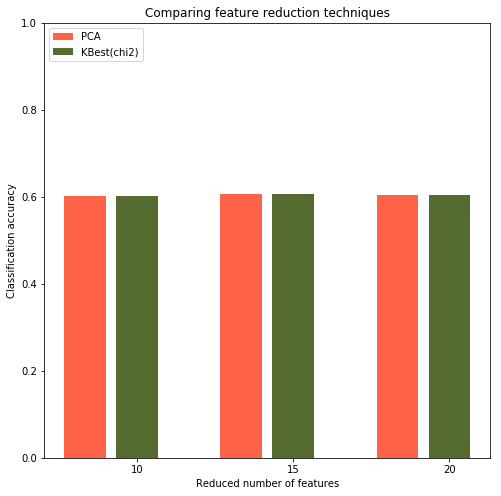

In [27]:
# Modified the Code for changes
# Original Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre


from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing

# transform the features using MinMaxScaler as many are negatives
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(__doc__)

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LogisticRegression())
])

N_FEATURES_OPTIONS = [10, 15, 20]
C_OPTIONS = [0.001, 0.1, 1, 10, 100, 1000]
max_iter_OPTIONS = [100, 150]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=10)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
]
reducer_labels = ['PCA', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_train_scaled, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = ['tomato', 'darkolivegreen', 'lightsteelblue']
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()


# 9. Learning Curves on the Model with Training and Validation 

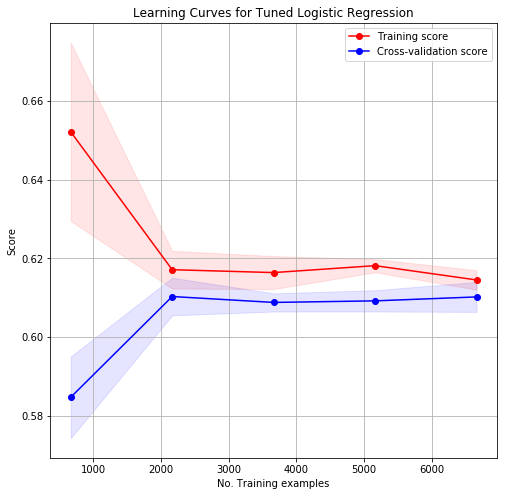

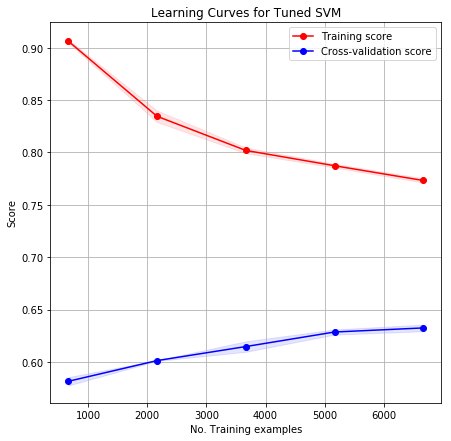

In [28]:
# learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, name, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title('Learning Curves for ' + name)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("No. Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


estimator = LogisticRegression(C=0.1, penalty='l1', max_iter=100)
plot_learning_curve(estimator, 'Tuned Logistic Regression', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()
estimator = SVC(C=100, gamma=0.01, kernel='rbf')
plot_learning_curve(estimator, 'Tuned SVM', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()


# 10. Model Selection, Training on Entire Train set and Estimating on Test Set

In [29]:
from time import time
from sklearn import metrics
# train and test classifiers


def train_and_test(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(metrics.classification_report(y_test, pred))
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for classifier, name in (
    (LogisticRegression(
        C=0.1, penalty='l1', max_iter=100), "Logistic Regressin"), (Perceptron(
            alpha=0.001, max_iter=100), "Perceptron"), (LinearDiscriminantAnalysis(
                tol=0.001), "LDA"), (GaussianNB(), "Naive Bayes"), (SVC(
                    C=100, gamma=0.01, kernel='rbf'), "SVM")):
    print('=' * 80)
    print(name)
    results.append(train_and_test(classifier))

    
indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]

Logistic Regressioin
________________________________________________________________________________
Training: 
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 0.180s
test time:  0.000s
accuracy:   0.617
classification report:
             precision    recall  f1-score   support

        0.0       0.60      0.52      0.56      2315
        1.0       0.63      0.70      0.66      2685

avg / total       0.61      0.62      0.61      5000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 0.103s


# 7. Plotting ROC Curves on Trained Models on Test Set

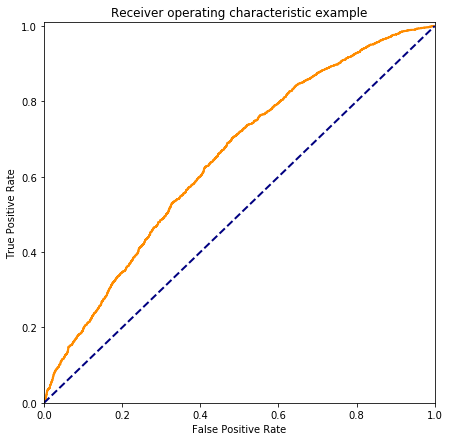

In [30]:
from sklearn import metrics

lr = LogisticRegression(C=0.1, penalty='l1', max_iter=150)
lr.fit(X_train, y_train)
lrpreds = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lrpreds)
plt.figure()
lw = 2
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

## 8. Using Other Algorithms 

KNN: 0.591185 (0.010300)
CART: 0.590639 (0.009537)
Bag: 0.753242 (0.015860)
RF: 0.756037 (0.017219)
Bo: 0.591347 (0.012364)
ELE: 0.669972 (0.019464)


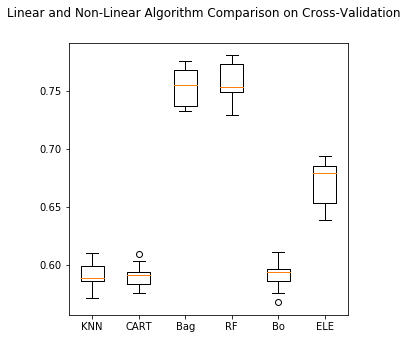

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Bag', BaggingClassifier(DecisionTreeClassifier(),100, random_state=7)))
models.append(('RF', RandomForestClassifier(100, max_features=5)))
models.append(('Bo', AdaBoostClassifier(DecisionTreeClassifier(),100, random_state=7)))
# create a voting estimation 
estimators = []
estimators.append(('logistic',LogisticRegression()))
estimators.append(('NB',  GaussianNB()))
models.append(('ELE',VotingClassifier(estimators, voting='soft')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# replace with 'accuracy', 'neg_log_loss',.. based on the need
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure() 
fig.suptitle('Linear and Non-Linear Algorithm Comparison on Cross-Validation') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()